In [1]:
import networkx as nx

In [2]:
import NEAT 

In [3]:
network = NEAT.network()

In [4]:
network.initalize_network(8, 4)

In [5]:
G = nx.DiGraph()

In [6]:
G.add_nodes_from(network.nodes)

In [7]:
import matplotlib.pyplot as plt

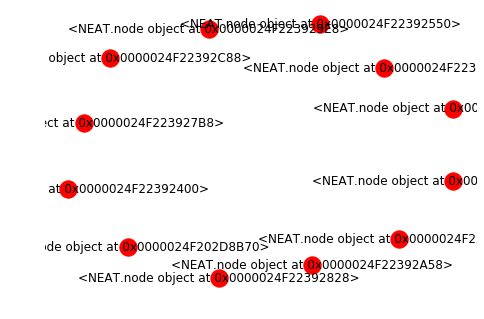

In [8]:
nx.draw(G, with_labels = True)

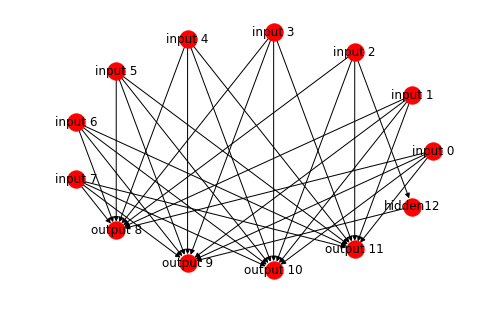

In [9]:
network.mutation()
network.generate_graph()
network.draw_graph()

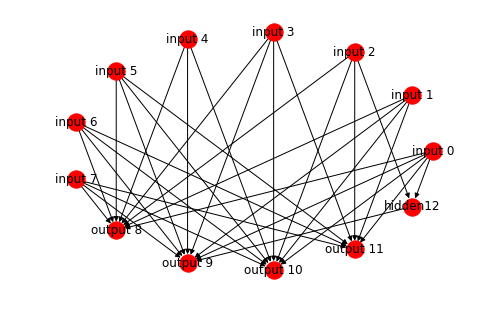

In [10]:
for i in range(10):
    network.mutation()
network.generate_graph()
network.draw_graph()

In [11]:
n = NEAT.network()

In [12]:
n.initalize_network(4, 4, [4,5,3,9])

In [13]:
for i in range(30):
    n.mutation()

In [14]:
for output in n.output_nodes:
    output.get_value()
for node in n.nodes:
    if not node.is_input:
        value_sum = 0
        for connection in node.connected_to_in:
            if connection.enabled:
                value_sum += connection.input_node.value * connection.weight
        print(value_sum == node.value, node.label)

True output 4
True output 5
True output 6
True output 7
True hidden8
True hidden9


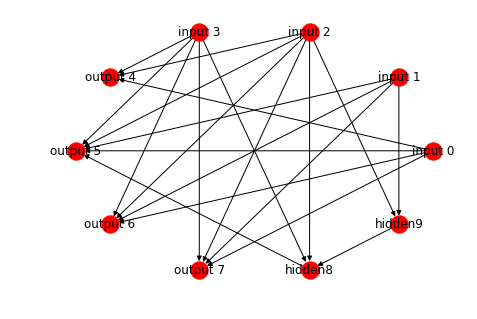

In [15]:
n.generate_graph()
n.draw_graph()

In [16]:
y = [connection for connection in n.weights]

In [17]:
sorted(y, key = lambda x: x.innovation_number, reverse = True)

In [18]:
y

In [19]:
n.convert_to_genes()

In [20]:
for gene in n.genes:
    gene.print_gene()

input:  input 0
output:  output 4
innotvaion number:  0




input:  input 0
output:  output 5
innotvaion number:  0




input:  input 0
output:  output 6
innotvaion number:  0




input:  input 0
output:  output 7
innotvaion number:  0




input:  input 1
output:  output 4
innotvaion number:  0
DISABLED 



input:  input 1
output:  output 5
innotvaion number:  0




input:  input 1
output:  output 6
innotvaion number:  0




input:  input 1
output:  output 7
innotvaion number:  0




input:  input 2
output:  output 4
innotvaion number:  0




input:  input 2
output:  output 5
innotvaion number:  0




input:  input 2
output:  output 6
innotvaion number:  0




input:  input 2
output:  output 7
innotvaion number:  0




input:  input 3
output:  output 4
innotvaion number:  0




input:  input 3
output:  output 5
innotvaion number:  0




input:  input 3
output:  output 6
innotvaion number:  0




input:  input 3
output:  output 7
innotvaion number:  0




input:  input 3
output:  hidden

In [21]:
n.genes

In [22]:
new = NEAT.create_new_network_from_genes(n.genes)

In [23]:
new.generate_graph()

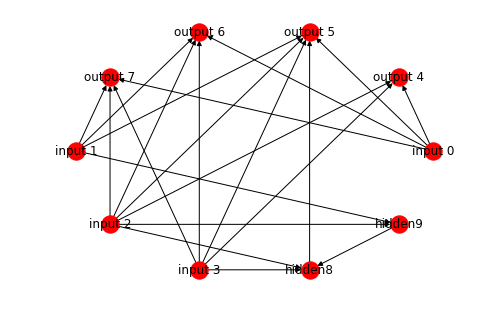

In [24]:
new.draw_graph()

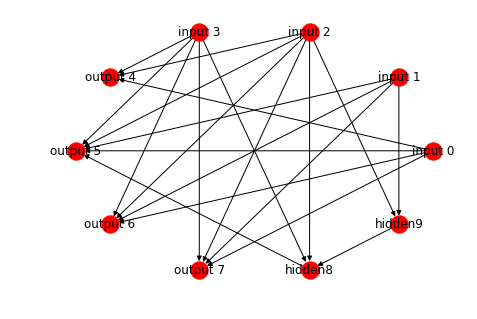

In [25]:
n.draw_graph()

In [26]:
nx.is_isomorphic(n.graph, new.graph)

True

In [27]:
new.reset_network()

In [28]:
new.evaluate_network()

[(0.22424868815805432, 'output 4'),
 (-4703715.56591603, 'output 5'),
 (34.316279408918895, 'output 6'),
 (12.204261586210446, 'output 7')]

In [29]:
n.evaluate_network()

[(0.22424868815805432, 'output 4'),
 (-4703715.56591603, 'output 5'),
 (34.316279408918895, 'output 6'),
 (12.204261586210446, 'output 7')]

In [30]:
for node in n.nodes:
    for another_node in new.nodes:
        if node.label == another_node.label:
            print(node.value == another_node.value)

True
True
True
True
True
True
True
True
True
True


In [31]:
nother = NEAT.network()

In [32]:
nother.initalize_network(10,4, [1,2,3,4,5,6,7,8,9,10000])

In [33]:
NEAT.is_networks_equal(n, new)

True

In [34]:
NEAT.is_networks_equal(nother, n)

False